# Movie Success Analysis

![movie_production.jpg](images/movie_production.jpg)

# Overview

In order to provide insight into an unfamiliar industry and discover what types of movies are successful, this project uses descriptive analysis to understand what genres and cinema release months are successful regarding revenue and reviews. Microsoft can use this analysis in order to create a strong and profitable production studio.

# Business Problem

![images/movie_studios.png](images/movie_studios.png)

Competition against corporations that have historical industry knowledge is a daunting problem for a new movie production studio. In order to ensure the best possible start to the studio, it is paramount that Microsoft understands what type of movies are often most successful regarding profits, ratings and the best release month, and then use these parameters for their first film. This will ensure funding and budgets for future films they wish to make and the continued success of the project. Microsoft can also use the same analysis with updated market data to view changes in these trends overtime.

# Data Understanding

![images/logo_merged.png](images/logo_merged.png)

The data I have used to analyse for this project includes movie information from IMDb, and the financial website Box Office Mojo run by the same company. The reason this data was chosen is because it had the largest spread of movies at over 2,800. Once collated and joined, the data files provided the financial data for each movie (including production value and worldwide gross revenue), as well as other key characteristics such as genres and month of release.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('fivethirtyeight')

In [10]:
df = pd.read_csv('code/data/final_clean.csv')
df.head()

,id,release_date,movie,averagerating,genres,gross_revenue
0,1,2009-12-18,Avatar,6.1,Horror,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.6,Action,635063875
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.6,Adventure,635063875
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.6,Fantasy,635063875
4,3,2019-06-07,Dark Phoenix,6.0,Action,-200237650


In [3]:
df["release_date"] = pd.to_datetime(df["release_date"])

# Data Preparation & Cleaning

In order to draw several comparisons between reviews, gross revenue and the genre of the movie, we first need to import and join 3 different datasets, two from IMDb. I use an inner join to exlude any unmatched data and ensure there are no missing values for the data feature columns I create such as `gross_revenue`.

Each movie has at maximum three different genre categories. To enable analysis into the different genres, I split and explode these values into their own rows.

Once joined and column set to the appropriate types, I make the data easier to comprehend by removing columns that are unnessecary for future analysis. For full code and steps on the preparation please view the Jupyter Notebook [Data Cleaning](code/Data_Cleaning.ipynb).

# Analysis

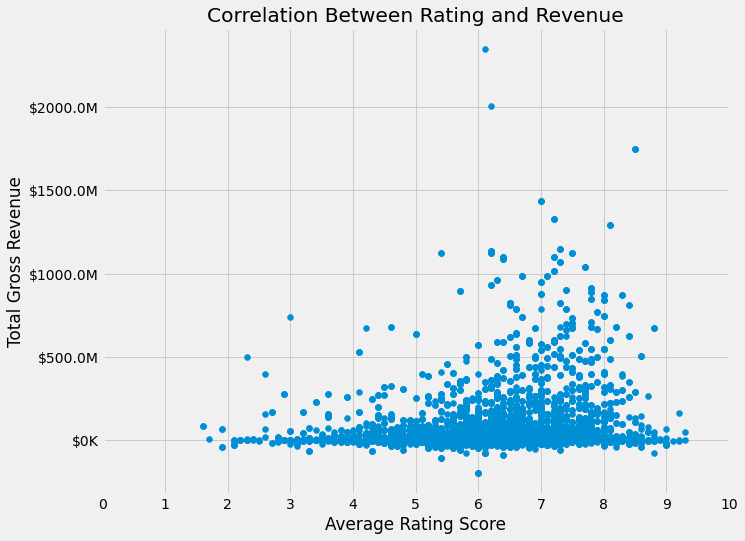

In [4]:
x = df["averagerating"]
y = df["gross_revenue"]
fig, ax = plt.subplots()

def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

ax.set_xlabel("Average Rating Score")
ax.set_xlim([0, 10])
ax.set_xticks(np.arange(0, 11, 1))
ax.set_ylabel("Total Gross Revenue")
ax.yaxis.set_major_formatter(currency)
ax.set_title("Correlation Between Rating and Revenue")

plt.scatter(x,y);

plt.savefig("images/review_vs_revenue.png", bbox_inches='tight')

Most movies that do well financially show a trend of being within the review score of 6 to 7 out of a total of 10, therefore movies that do well in overall profits are also generally well received.

In [5]:
genre_df = df.groupby("genres")["gross_revenue"].mean()
genre_df = genre_df.astype(int)
genre_df = genre_df.reset_index()

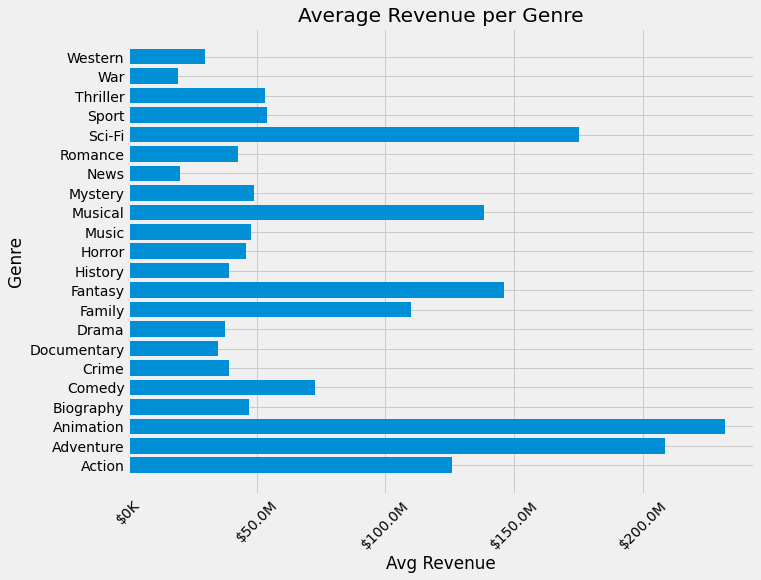

In [14]:
x = genre_df["genres"]
y = genre_df["gross_revenue"]

fig, ax = plt.subplots()

ax.set_xlabel("Avg Revenue")
ax.xaxis.set_major_formatter(currency)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylabel("Genre")
ax.set_title("Average Revenue per Genre")
plt.barh(x, y);

plt.savefig("images/revenue_genre.png", bbox_inches='tight')

The genre "Animation" had the highest average revenue at just under $250 million USD. This success could be attributed to the fact that animated films are often associate with family friendly movies, which can be an extremely large customer base but also very diverse. The genres of Adventure and Sci-Fi came in as a close second and third in revenue as well.

In [7]:
trend_df = df.groupby(df.release_date.dt.month)["gross_revenue"].mean()
trend_df = trend_df.to_frame()
trend_df = trend_df.reset_index()

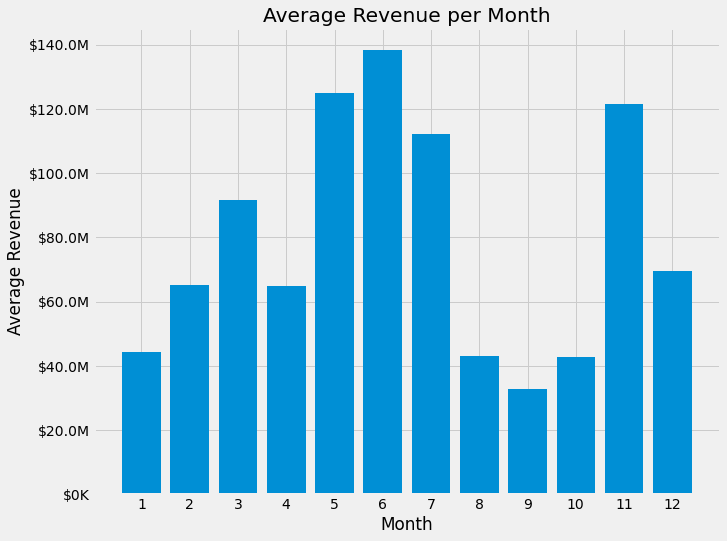

In [8]:
x = trend_df["release_date"]
y = trend_df["gross_revenue"]

fig, ax = plt.subplots()

ax.set_xlabel("Month")
ax.set_xticks(x)
ax.set_ylabel("Average Revenue")
ax.yaxis.set_major_formatter(currency)
ax.set_title("Average Revenue per Month")
plt.bar(x, y);

plt.savefig("images/revenue_month.png", bbox_inches='tight')

There are peaks in the months of March, June, July and November that showcase increased movie revenue. June's profitability is likely because this is during the Winter/Summer school holiday periods. The November peak can be attributed to the fact that in order for a movie to qualify for the next round of Academy Awards, it needs to have been on general release before 31st December of the year prior. Studios will often release movies that they want to qualify for these awrads during this month.

# Conclusions

With this analysis, I therefore make the following three recommendations for the beginning of the new Microsoft Movie Production Studio:

- **The studio should focus on producing animated films.** Not only is this category of movie extremely profitable, but it is also very diverse and has a large and stable audience base.
- **Combine the genres of Adventure and Sci-Fi for the first movie.** This profitable combination will lead into the stability of the business venture by ensuring it has enough funds and budget to continue making movies in the future.
- **The cinema release dates of the first movie should be during the months of March, June, July or November.** These months have been showcased to be a good financial period, but it also means the movies will be qualified to be reviewed for the next Academy Awards.

## Next Steps

Further analysis could produce supplementary understanding of what is considered a successful movie:

- **Investigate what is understood to be an under-performing movie.** This modelling can be done with the current available data and provide insight into which genres do not do well regarding revenue and reviews and therefore which ones pose a higher risk to produce.
- **Analyse which movie ratings (such as PG, MA and R) do well regarding reviews and revenue.** Using further external data sources to correlate this information, this could help hone the scope of what is considered a successful movie.
- **Combine the review data with sources from several other rating sites.** This data will have a more sophisticated, overall understanding of what is considered a film that is worth watching.